# Khai báo thư viện

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\renny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\renny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Đưa tập dữ liệu vào chương trình

In [117]:
df = pd.read_csv('sentiment-analysis.csv')

In [118]:
df.head()

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


In [125]:
data = df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand=True)
data = data.set_axis(['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score'], axis=1)
data.drop(columns=['Date/Time', 'Confidence Score'], inplace=True)
data

,Text,Sentiment,Source,User ID,Location
0,"""I love this product!""",Positive,Twitter,@user123,New York
1,"""The service was terrible.""",Negative,Yelp Reviews,user456,Los Angeles
2,"""This movie is amazing!""",Positive,IMDb,moviefan789,London
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,forumuser1,Toronto
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,foodie22,Paris
...,...,...,...,...,...
93,"""I can't stop listening to this song. It's my ...",Positive,Spotify,musiclover789,Berlin
94,"""Their website is so confusing and poorly desi...",Negative,Website Review,user789,Toronto
95,"""I had an incredible experience at the theme p...",Positive,Trip Report,thrillseeker1,Orlando
96,NaN,NaN,NaN,NaN,NaN


In [126]:
data.isnull().sum()

Text         2
Sentiment    2
Source       2
User ID      2
Location     2
dtype: int64

In [127]:
data.dropna(inplace = True)

# Khai phá dữ liệu văn bản

In [128]:
data['Sentiment'] = data['Sentiment'].str.strip()
data['Sentiment'] = data['Sentiment'].str.lower()

### Số lượng phản hồi dựa trên 2 biến độc lập

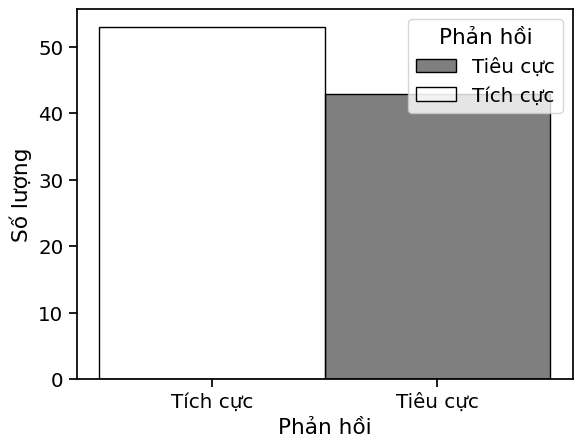

In [130]:
data2 = data.copy()
data2['Sentiment'] = data2['Sentiment'].replace({'positive': 'Tích cực', 'negative': 'Tiêu cực'})

sns.histplot(data=data2, x=data2['Sentiment'], hue = 'Sentiment', palette = ['white', 'black'])
plt.xlabel('Phản hồi')
plt.ylabel('Số lượng')
plt.legend(['Tiêu cực', 'Tích cực'], title = 'Phản hồi')

### Số lượng các ký tự được dùng trong biến phụ thuộc theo cảm xúc tiêu cực và tích cực

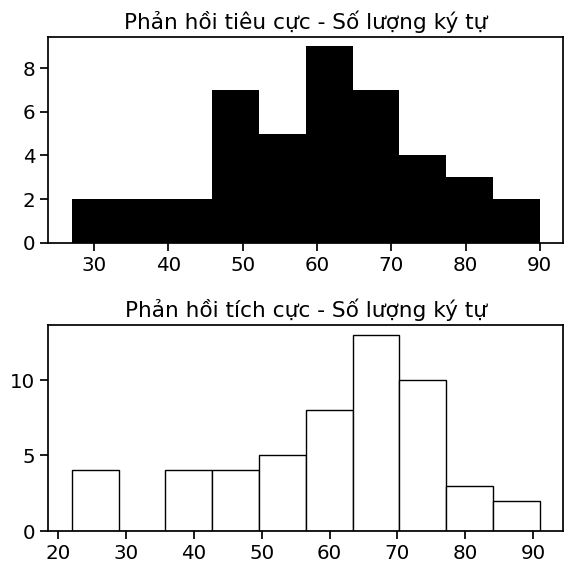

In [131]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6))

review_length_negative = data[data['Sentiment'] == 'negative']['Text'].str.len()
axes[0].hist(review_length_negative, color='black')
axes[0].set_title("Phản hồi tiêu cực - Số lượng ký tự")

review_length_positive = data[data['Sentiment'] == 'positive']['Text'].str.len()
axes[1].hist(review_length_positive, color='white', edgecolor = 'k', linewidth = 1)
axes[1].set_title("Phản hồi tích cực - Số lượng ký tự")


plt.tight_layout()
plt.show()

### Số lượng từ ngữ được dùng trong biến phụ thuộc theo cảm xúc tiêu cực và tích cực

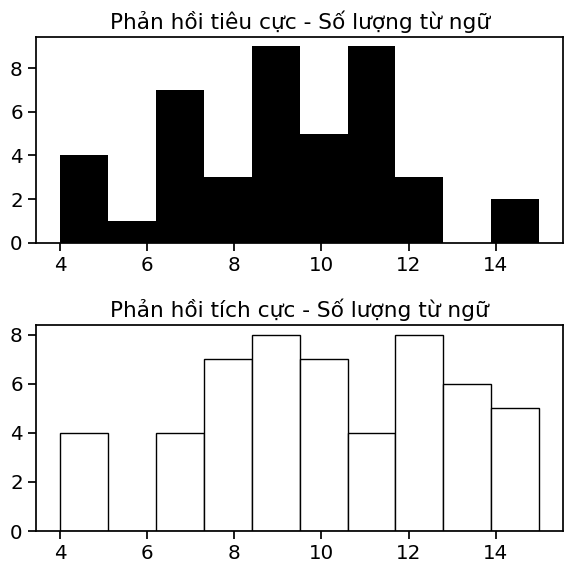

In [132]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6))

review_length_negative_words = data[data['Sentiment'] == 'negative']['Text'].str.split().map(lambda x: len(x))
axes[0].hist(review_length_negative_words, color='black')
axes[0].set_title("Phản hồi tiêu cực - Số lượng từ ngữ")

review_length_positive_words = data[data['Sentiment'] == 'positive']['Text'].str.split().map(lambda x: len(x))
axes[1].hist(review_length_positive_words, color='white', edgecolor = 'k', linewidth = 1)
axes[1].set_title("Phản hồi tích cực - Số lượng từ ngữ")

plt.tight_layout()
plt.show()

### Số lượng các phản hồi tích cực và tiêu cực theo mạng xã hội

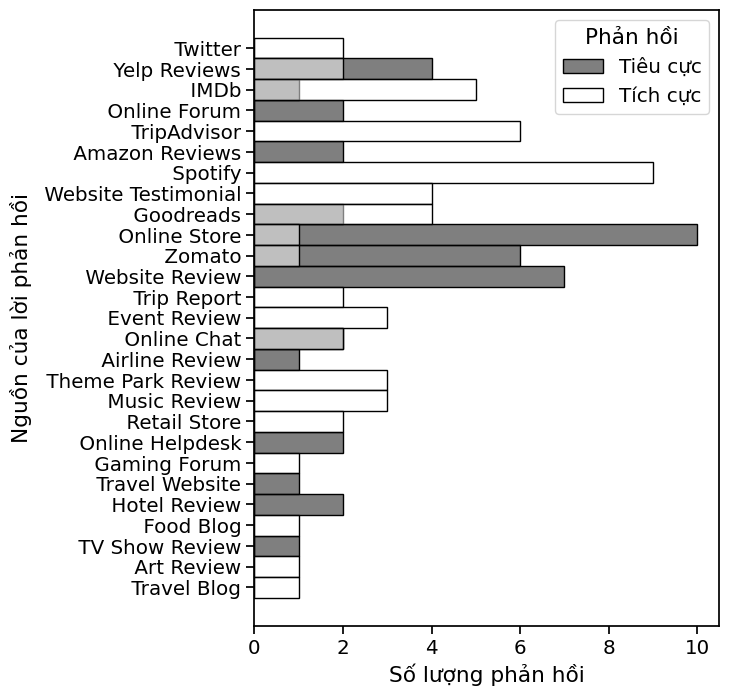

In [133]:
plt.figure(figsize = (6, 8))
sns.histplot(data = data,y = 'Source', hue = 'Sentiment', palette = ['white', 'black'])
plt.xlabel('Số lượng phản hồi')
plt.ylabel('Nguồn của lời phản hồi')
plt.legend(['Tiêu cực', 'Tích cực'], title = 'Phản hồi')
plt.show()

### Số lượng các phản hồi tích cực và tiêu cực theo thành phố/tỉnh/quốc gia

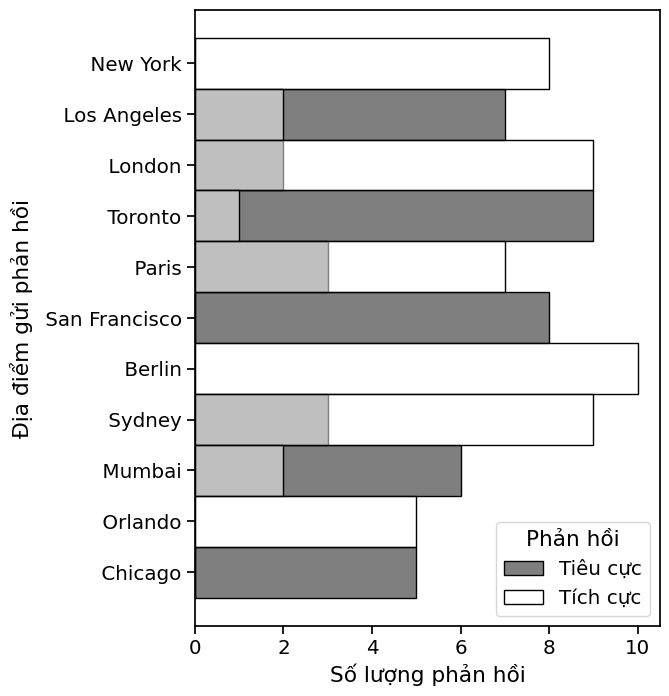

In [134]:
plt.figure(figsize=(6,8))
sns.histplot(data=data,y='Location',hue='Sentiment', palette = ['white', 'black'])
plt.xlabel('Số lượng phản hồi')
plt.ylabel('Địa điểm gửi phản hồi')
plt.legend(['Tiêu cực', 'Tích cực'], title = 'Phản hồi')
plt.show()

### Số lượng dấu câu của từng phản hồi

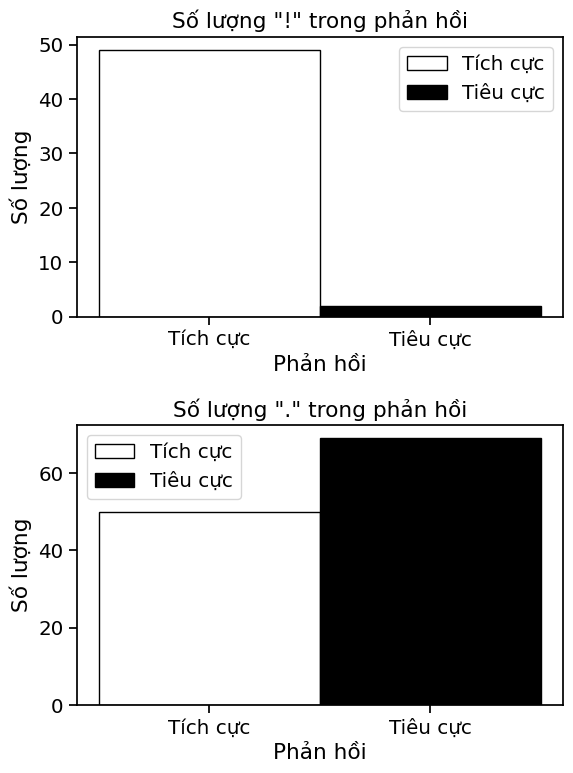

In [135]:
def count_punctuation_marks(sentiment, punctuation):
    count = 0
    for text in data2[data2['Sentiment'] == sentiment]['Text']:
        count += text.count(punctuation)
    return count

def plot_punctuation_counts():
    punctuations = ['!', '.']
    sentiments = ['Tích cực', 'Tiêu cực']
    colors = ['white', 'black']

    fig, axes = plt.subplots(2, 1, figsize=(6, 8))

    for idx, punctuation in enumerate(punctuations):
        for sentiment, color in zip(sentiments, colors):
            count = count_punctuation_marks(sentiment, punctuation)
            axes[idx].bar(sentiment, count, color=color, width=1, ec='k')
        
        axes[idx].set_xlabel('Phản hồi')
        axes[idx].set_ylabel('Số lượng')
        axes[idx].set_title(f'Số lượng "{punctuation}" trong phản hồi')
        axes[idx].legend(sentiments)

    plt.tight_layout()

plot_punctuation_counts()
plt.show()

# Phân phối người dùng

### Những người dùng gửi hơn 2 phản hồi

In [136]:
data['User ID'] = data['User ID'].str.strip()

user_reviews = data.groupby('User ID').agg(
    ReviewCount=('Text', 'count'),
    SentimentDistribution=('Sentiment', lambda x: dict(x.value_counts()))
).reset_index()

user_reviews = user_reviews[user_reviews['ReviewCount'] >= 2]

sentiment_data = pd.DataFrame(user_reviews['SentimentDistribution'].to_list())
sentiment_data.index = user_reviews['User ID']
sentiment_data = sentiment_data.fillna(0)
sentiment_data

,positive,negative
User ID,,
@user123,2.0,0.0
bookworm789,2.0,0.0
foodie22,2.0,0.0
foodlover123,0.0,2.0
foodlover2468,0.0,2.0
forumuser1,0.0,2.0
moviefan789,2.0,0.0
musiclover456,2.0,0.0
musiclover789,2.0,0.0


### Kiểm tra các phản hồi của cùng một người dùng

In [138]:
data[data['User ID'] == 'user456'][['Text', 'Source']]

,Text,Source
1,"""The service was terrible.""",Yelp Reviews
9,"""The customer service was terrible.""",Yelp Reviews
80,"""The service was terrible.""",Yelp Reviews
88,"""The customer service was terrible.""",Yelp Reviews


# Tiền xử lý dữ liệu

### In thường các văn bản (các phản hồi)

In [142]:
def convert_lowercase(text):
    text = text.lower()
    return text

data['Text'] = data['Text'].apply(convert_lowercase)
data[['Text', 'Sentiment']]

,Text,Sentiment
0,"""i love this product!""",positive
1,"""the service was terrible.""",negative
2,"""this movie is amazing!""",positive
3,"""i'm so disappointed with their customer suppo...",negative
4,"""just had the best meal of my life!""",positive
...,...,...
91,"""just had the most amazing vacation! i can't w...",positive
92,"""the food at this restaurant was awful. never ...",negative
93,"""i can't stop listening to this song. it's my ...",positive
94,"""their website is so confusing and poorly desi...",negative


### Loại bỏ dấu câu

In [143]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['Text'] = data['Text'].apply(remove_punc)
data[['Text', 'Sentiment']]

,Text,Sentiment
0,i love this product,positive
1,the service was terrible,negative
2,this movie is amazing,positive
3,im so disappointed with their customer support,negative
4,just had the best meal of my life,positive
...,...,...
91,just had the most amazing vacation i cant wait...,positive
92,the food at this restaurant was awful never go...,negative
93,i cant stop listening to this song its my new ...,positive
94,their website is so confusing and poorly designed,negative


### Loại bỏ từ dừng

In [144]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    for word in words:
        if word not in stop:
            new_list.append(word)
    return ' '.join(new_list)

data['Text'] = data['Text'].apply(remove_stopwords)
data[['Text', 'Sentiment']]

,Text,Sentiment
0,love product,positive
1,service terrible,negative
2,movie amazing,positive
3,im disappointed customer support,negative
4,best meal life,positive
...,...,...
91,amazing vacation cant wait go back,positive
92,food restaurant awful never going back,negative
93,cant stop listening song new favorite,positive
94,website confusing poorly designed,negative


### Rút gọn gốc của các từ ngữ

In [145]:
from nltk.stem.wordnet import WordNetLemmatizer

def perform_lemmatization(text):
    lem = WordNetLemmatizer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(lem.lemmatize(word, 'v'))

    return " ".join(new_list)

data['Text'] = data['Text'].apply(perform_lemmatization)
data[['Text', 'Sentiment']]

,Text,Sentiment
0,love product,positive
1,service terrible,negative
2,movie amaze,positive
3,im disappoint customer support,negative
4,best meal life,positive
...,...,...
91,amaze vacation cant wait go back,positive
92,food restaurant awful never go back,negative
93,cant stop listen song new favorite,positive
94,website confuse poorly design,negative


### Biểu đồ đếm số lượng từ ngữ phổ biến nhất xuất hiện trong các phản hồi theo cảm xúc tích cực và tiêu cực

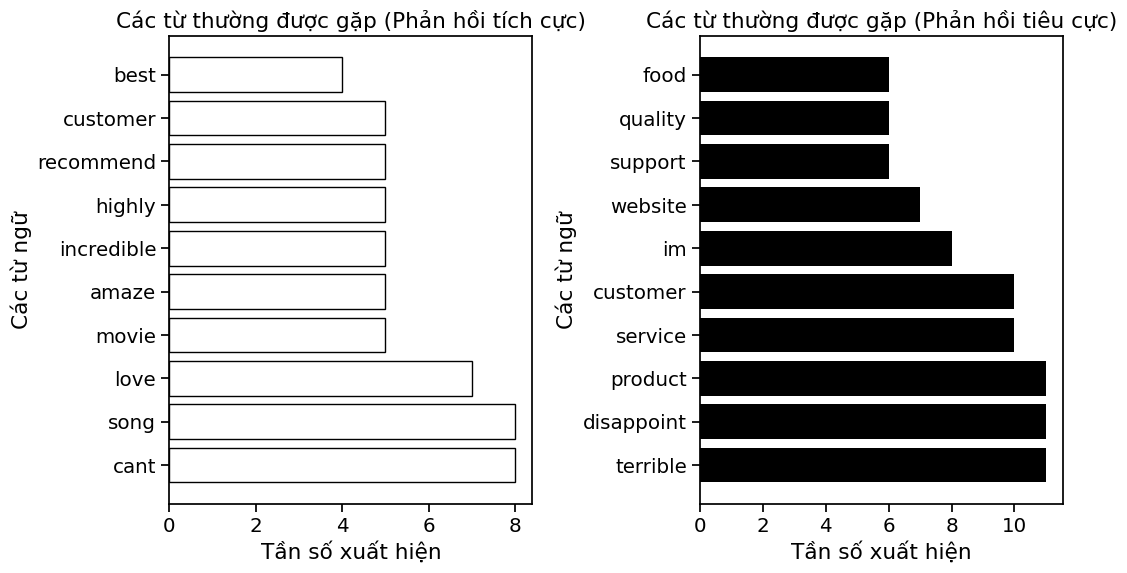

In [146]:
from collections import defaultdict

def create_corpus(sentiment):
    corpus=[]
    for x in data[data['Sentiment']==sentiment]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


plt.figure(figsize = (11, 6))
def plot_most_common_words(corpus, sentiment, color):
    word_freq = defaultdict(int)
    for word in corpus: 
        word_freq[word] += 1

    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    x, y = zip(*top_words)
    p, n, pos = 'tích cực', 'tiêu cực', 'positive'

    plt.barh(x, y, color=color, ec='k' if color == 'white' else None, linewidth = 1)  
    plt.ylabel('Các từ ngữ')          
    plt.xlabel('Tần số xuất hiện')      
    plt.title(f'Các từ thường được gặp (Phản hồi {p if sentiment.lower() == pos else n})')


corpus_positive = create_corpus('positive')
plt.subplot(1, 2, 1)
plot_most_common_words(corpus_positive, 'positive', 'white')

corpus_negative = create_corpus('negative')
plt.subplot(1, 2, 2)
plot_most_common_words(corpus_negative, 'negative', 'black')
plt.subplots_adjust(wspace=0.5)  
plt.tight_layout()
plt.show()

# Phân loại văn bản (phản hồi)

In [147]:
data['Sentiment'] = data['Sentiment'].replace({'negative': 0, 'positive': 1})

In [148]:
data[['Text', 'Sentiment']]

,Text,Sentiment
0,love product,1
1,service terrible,0
2,movie amaze,1
3,im disappoint customer support,0
4,best meal life,1
...,...,...
91,amaze vacation cant wait go back,1
92,food restaurant awful never go back,0
93,cant stop listen song new favorite,1
94,website confuse poorly design,0


In [176]:
X = data['Text']
y = data['Sentiment'].values

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2, stratify=y)

### Tf-idf (Term Frequency - Inverse Document Frequency Vectorizer)

In [178]:
X_test

14                   cant stop listen song new favorite
76             food restaurant mediocre nothing special
27             playlist goto workouts energize motivate
7                             website userfriendly love
91                     amaze vacation cant wait go back
71               product receive poor quality break use
87                                 love movie fantastic
19                 terrible experience customer support
85                     cant stop listen song incredible
45    customer support quick respond resolve issue i...
73    customer service store outstanding truly care ...
24             worst flight experience delay rude staff
70    ride cruise ship unforgettable experience love...
21                      customer service store topnotch
37     terrible experience technical support resolution
17                     product arrive damage disappoint
43       product order arrive damage disappoint package
83                                       best me

In [179]:
tfidf = TfidfVectorizer(min_df=2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [180]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.45778178, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.54711343, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.43791509, 0.        , 0.        ,
       0.        , 0.54711343, 0.        , 0.        , 0.     

In [154]:
words_set = tfidf.get_feature_names_out()
print("Các thuật ngữ từ tập thử:",words_set)
print("Số lượng thuật ngữ:",len(words_set))

Các thuật ngữ từ tập thử: ['absolutely' 'always' 'amaze' 'arrive' 'awful' 'back' 'band' 'best'
 'book' 'breathtaking' 'cant' 'captivate' 'coaster' 'concert' 'confuse'
 'customer' 'delicious' 'design' 'difficult' 'disappoint' 'end'
 'experience' 'extremely' 'feel' 'find' 'finish' 'food' 'frustrate'
 'frustratingly' 'fun' 'go' 'good' 'highly' 'hotel' 'im' 'improvement'
 'incredible' 'inspire' 'listen' 'load' 'love' 'make' 'masterpiece' 'mood'
 'movie' 'much' 'navigate' 'need' 'never' 'nostalgic' 'order' 'park'
 'poor' 'poorly' 'product' 'put' 'quality' 'recommend' 'remind'
 'resolution' 'restaurant' 'ride' 'roller' 'rude' 'service' 'show' 'slow'
 'song' 'sound' 'speed' 'staff' 'stop' 'subpar' 'support' 'terrible'
 'theme' 'thrill' 'time' 'unprofessional' 'userfriendly' 'wait' 'website']
Số lượng thuật ngữ: 82


In [155]:
df_tf_idf = pd.DataFrame(X_test, columns = words_set)
print(df_tf_idf[['song', 'cant', 'stop', 'listen']])

        song      cant      stop    listen
0   0.437915  0.457782  0.547113  0.547113
1   0.000000  0.000000  0.000000  0.000000
2   0.000000  0.000000  0.000000  0.000000
3   0.000000  0.000000  0.000000  0.000000
4   0.000000  0.421115  0.000000  0.000000
5   0.000000  0.000000  0.000000  0.000000
6   0.000000  0.000000  0.000000  0.000000
7   0.000000  0.000000  0.000000  0.000000
8   0.394593  0.412495  0.492989  0.492989
9   0.000000  0.000000  0.000000  0.000000
10  0.000000  0.000000  0.000000  0.000000
11  0.000000  0.000000  0.000000  0.000000
12  0.000000  0.000000  0.000000  0.000000
13  0.000000  0.000000  0.000000  0.000000
14  0.000000  0.000000  0.000000  0.000000
15  0.000000  0.000000  0.000000  0.000000
16  0.000000  0.000000  0.000000  0.000000
17  0.000000  0.000000  0.000000  0.000000
18  0.000000  0.000000  0.000000  0.000000
19  0.000000  0.000000  0.000000  0.000000


### Huấn luyện mô hình phân loại

In [181]:
def model_training(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Độ chính xác (Accuracy) của mô hình: {accuracy}')
    print(f'Điểm Precision của mô hình: {precision}')
    print(f'Điểm Recall của mô hình: {recall}')

In [182]:
nb = MultinomialNB()
model_training(nb)

Độ chính xác (Accuracy) của mô hình: 0.85
Điểm Precision của mô hình: 1.0
Điểm Recall của mô hình: 0.727


In [234]:
lr = LogisticRegression()
model_training(lr)

Độ chính xác (Accuracy) của mô hình: 0.8
Điểm Precision của mô hình: 0.889
Điểm Recall của mô hình: 0.727


### Dự đoán với các phản hồi mới

In [250]:
new_positive_review = "This place is so beautiful and I love it!"
new_negative_review = "The service is terrible to the point that I wouldn't recommend using it at all!"
new_reviews = [new_positive_review, new_negative_review]

In [263]:
reviews_for_pred = []

for review in range(len(new_reviews)):
    lowered = convert_lowercase(new_reviews[review]) # in chữ thường

    removed_punc = remove_punc(lowered) # loại bỏ dấu câu

    removed_stopwords = remove_stopwords(removed_punc) # loại bỏ từ dừng

    lemmatized = perform_lemmatization(removed_stopwords) # thực hiện rút gọn gốc
    print("Phản hồi",review+1,"sau quá trình rút gọn gốc:",lemmatized)
    
    calculated = tfidf.transform([lemmatized]).toarray() 
        
    reviews_for_pred.append(calculated[0])

print("Phản hồi 1:",reviews_for_pred[0],"\nPhản hồi 2:",reviews_for_pred[1])

Phản hồi 1 sau quá trình rút gọn gốc: place beautiful love
Phản hồi 2 sau quá trình rút gọn gốc: service terrible point wouldnt recommend use
Phản hồi 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
Phản hồi 2: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.63595505 0.    

In [267]:
new_review = pd.DataFrame(reviews_for_pred, columns = words_set)
print(new_review[['love', 'service', 'terrible', 'recommend']])

   love   service  terrible  recommend
0   1.0  0.000000  0.000000   0.000000
1   0.0  0.527433  0.563361   0.635955


In [268]:
pred_nb = nb.predict(reviews_for_pred)
pred_lr = lr.predict(reviews_for_pred)


for i in range(len(reviews_for_pred)):
    
    if pred_nb[i] == 1:
        print("Naive Bayes: Phản hồi",i+1,"là phản hồi tích cực!")
    else:
        print("Naive Bayes: Phản hồi",i+1,"là phản hồi tiêu cực.")

    if pred_lr[i] == 1:
        print("Logistic Regression: Phản hồi",i+1,"là phản hồi tích cực!")
    else:
        print("Logistic Regression: Phản hồi",i+1,"là phản hồi tiêu cực.")

Naive Bayes: Phản hồi 1 là phản hồi tích cực!
Logistic Regression: Phản hồi 1 là phản hồi tích cực!
Naive Bayes: Phản hồi 2 là phản hồi tiêu cực.
Logistic Regression: Phản hồi 2 là phản hồi tiêu cực.
